In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from stfe.gene_utils import get_markers
import scanpy as sc
from plotly3d.plot import trajectories
from sklearn.cluster import KMeans
import pandas as pd
import pathlib
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
output_dir = '../results_final_Jan30/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [4]:
gene_names = adata.var_names.to_numpy()

In [5]:
draft_matrix = pd.read_csv('../data/new_all_pval.csv', index_col=0)

alex_genes = [c.strip('_y') for c in draft_matrix.columns]
alex_tfs = [c.strip('_x') for c in draft_matrix.index]

In [6]:
traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
# alex_genes = open('../data/hvg.txt').read().splitlines()
# alex_tfs = open('../data/hv_tf.txt').read().splitlines()



alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

In [7]:
traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))

In [8]:
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T


In [9]:
# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]
trends_df_sorted

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99
DIXDC1,1.000000,0.981921,0.964337,0.947038,0.927634,0.905687,0.880234,0.853815,0.823901,0.790278,...,0.137515,0.139257,0.136816,0.133723,0.126518,0.116375,0.106988,0.097398,0.089983,0.082230
C20orf27,0.998453,1.000000,0.998336,0.993987,0.986960,0.977617,0.965334,0.950901,0.929607,0.905102,...,0.255969,0.240026,0.218985,0.195673,0.167630,0.135923,0.103018,0.068586,0.033282,0.000000
FERMT1,0.982299,0.990048,0.995665,0.998958,1.000000,0.998409,0.993929,0.987952,0.975898,0.960580,...,0.299770,0.294718,0.282799,0.266537,0.244828,0.216226,0.182690,0.146923,0.110285,0.075628
RAB6A,1.000000,0.972786,0.951239,0.933575,0.916185,0.898932,0.880727,0.864303,0.849467,0.833335,...,0.000000,0.003530,0.011292,0.023554,0.043543,0.070562,0.111722,0.162037,0.228056,0.297522
ZPR1,0.974750,0.982865,0.989836,0.995618,0.998975,1.000000,0.998082,0.992678,0.980135,0.963833,...,0.199264,0.193390,0.184107,0.170226,0.150841,0.126962,0.100319,0.069522,0.034865,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DNAJC16,0.630710,0.600204,0.569047,0.539048,0.510244,0.481815,0.451909,0.425104,0.398205,0.373071,...,0.893786,0.912076,0.929594,0.950205,0.969119,0.986634,0.996211,1.000000,0.991556,0.975353
MXRA8,0.274816,0.264148,0.255450,0.247936,0.240965,0.234553,0.228000,0.220895,0.214811,0.207825,...,0.739285,0.758873,0.781741,0.807320,0.835618,0.866306,0.900379,0.934670,0.968785,1.000000
EMC1,0.254890,0.261279,0.267277,0.273663,0.278495,0.280732,0.279859,0.275538,0.267700,0.257155,...,0.828357,0.865140,0.902322,0.936198,0.964186,0.987424,0.999113,1.000000,0.982678,0.956355
MT-ATP6,0.775261,0.740617,0.704457,0.667769,0.629687,0.589235,0.545340,0.505296,0.465780,0.428103,...,0.921372,0.928128,0.934441,0.946418,0.959285,0.971548,0.980778,0.989718,0.995334,1.000000


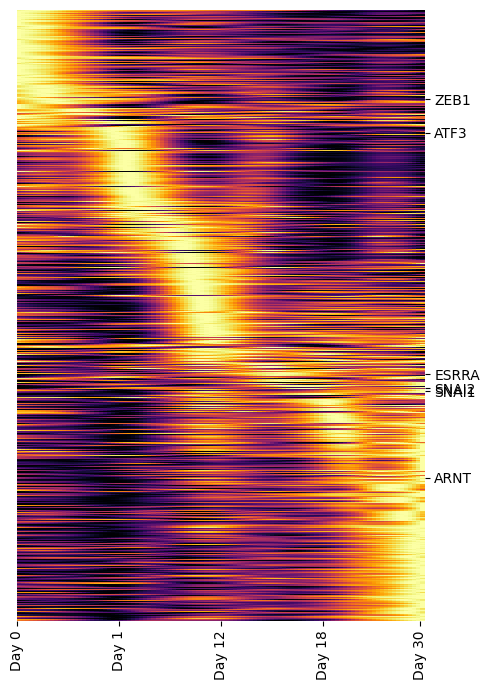

In [12]:
plt.figure(figsize=(5, 7))
# Create heatmap with selected y-ticks
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'ZEB1', 'ZEB2', 'TWIST1', 'TWIST2', 'SNAI1', 'SNAI2', 'EPCAM']
# ytick_genes = ['ESRRA', 'ZEB1', 'ARNT', 'SNAI1', 'SNAI2', 'ATF3']
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'RPL6']
ytick_genes = ['ESRRA', 'ZEB1', 'ARNT', 'SNAI1', 'SNAI2', 'ATF3']
ytick_positions = [trends_df_sorted.index.get_loc(gene) for gene in ytick_genes if gene in trends_df_sorted.index]
ytick_labels = [ytick_genes[i] for i,pos in enumerate(ytick_positions)]

# Create heatmap with y-axis on the right
ax = sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
                 cbar=False,
                 yticklabels=False)

# Move y-axis to the right and increase font size
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.yticks(ytick_positions, ytick_labels)

# Customize x-ticks to show days  
days = [0, 1, 12, 18, 30]
tick_positions = [0, 25, 50, 75, 99]  # Evenly spaced positions
plt.xticks(tick_positions, [f'Day {d}' for d in days])
plt.savefig(f'{output_dir}/gene_heatmap_extreme_T_draft.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.tight_layout()

<Axes: >

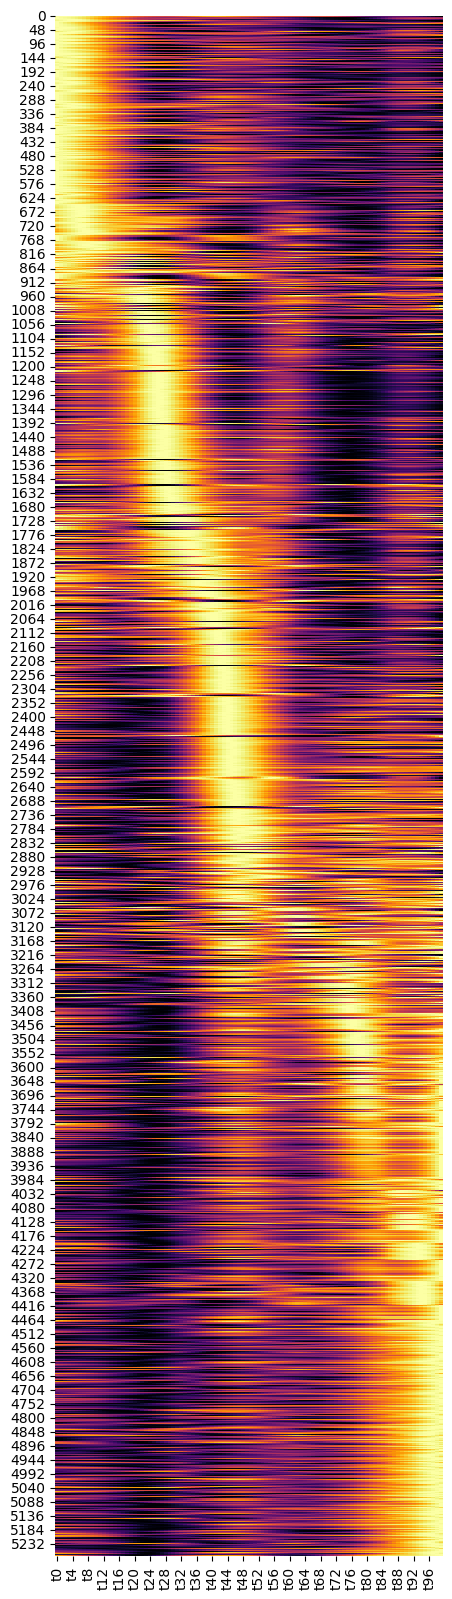

In [13]:
trends_df_sorted_numerical_index = trends_df_sorted.reset_index(drop=True)
plt.figure(figsize=(5, 20))
sns.heatmap(trends_df_sorted_numerical_index, cmap='inferno', vmin=0, vmax=1,
                 cbar=False)

In [14]:
# assert False
# Split indices into 5 groups using the cluster points
cluster_pts = [816, 1740, 3120, 4032]
cluster_groups = [
    trends_df_sorted.index[:cluster_pts[0]].tolist(),
    trends_df_sorted.index[cluster_pts[0]:cluster_pts[1]].tolist(),
    trends_df_sorted.index[cluster_pts[1]:cluster_pts[2]].tolist(), 
    trends_df_sorted.index[cluster_pts[2]:cluster_pts[3]].tolist(),
    trends_df_sorted.index[cluster_pts[3]:].tolist()
]

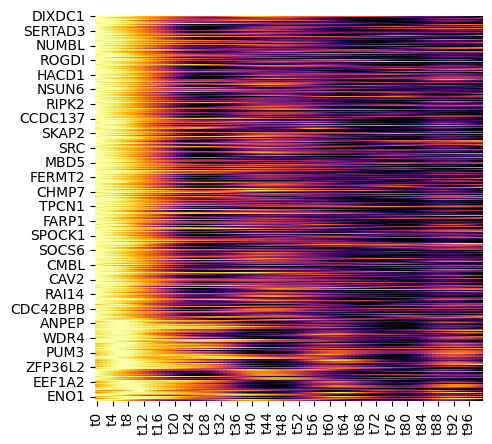

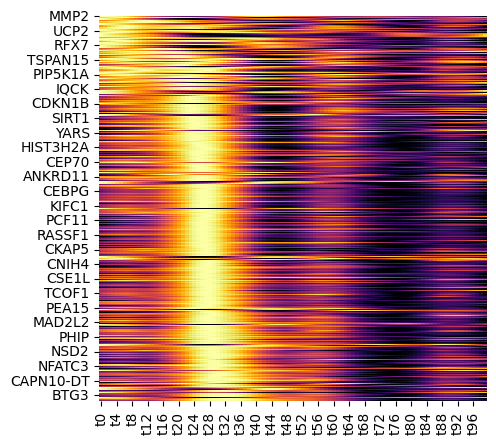

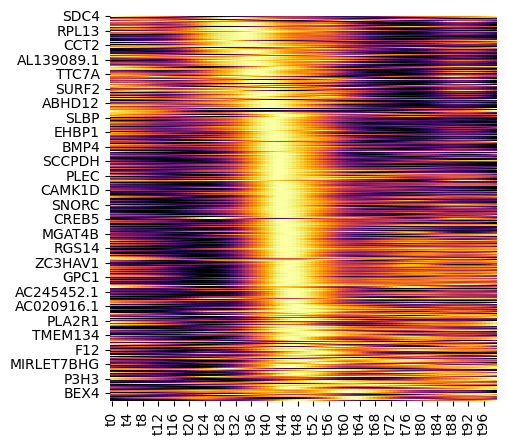

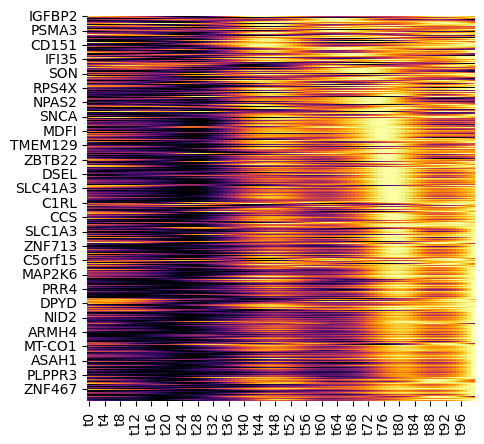

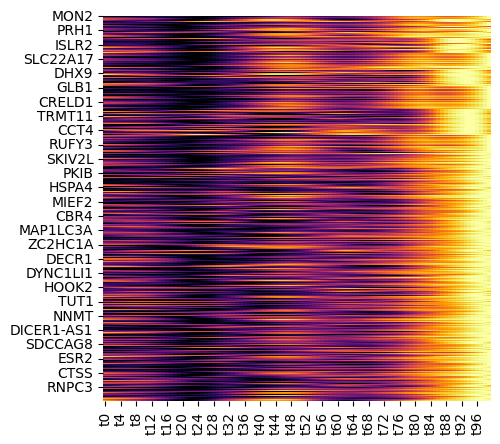

In [15]:
for trend_subset in cluster_groups:
    plt.figure(figsize=(5, 5))
    to_plot = trends_df_sorted.loc[trend_subset, :]
    sns.heatmap(to_plot, cmap='inferno', vmin=0, vmax=1,
                 cbar=False)

<Axes: >

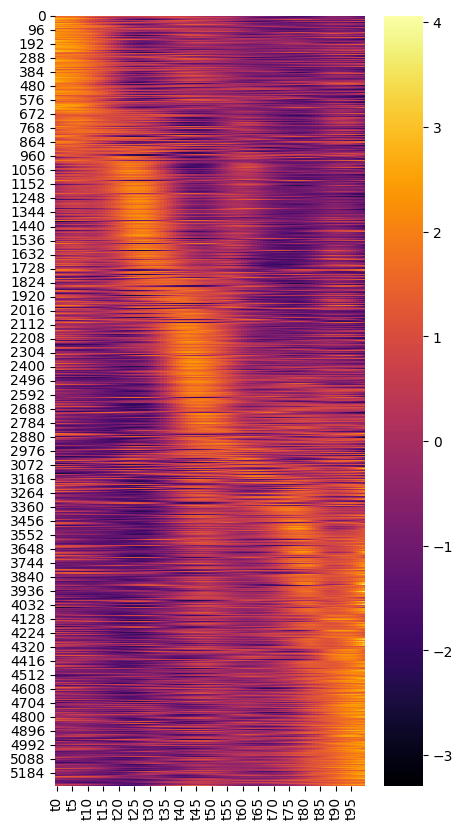

In [16]:
traj_mean_whiten = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
trends_df_whiten = pd.DataFrame(traj_mean_whiten, columns=gene_names, index=[f't{i}' for i in range(traj_mean_whiten.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df_whiten.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_whiten_sorted = trends_df_whiten.iloc[top_5_indices.argsort()]
trends_df_whiten_sorted

trends_df_whiten_sorted_numerical_index = trends_df_whiten_sorted.reset_index(drop=True)
plt.figure(figsize=(5, 10))
sns.heatmap(trends_df_whiten_sorted_numerical_index, cmap='inferno',
                 )

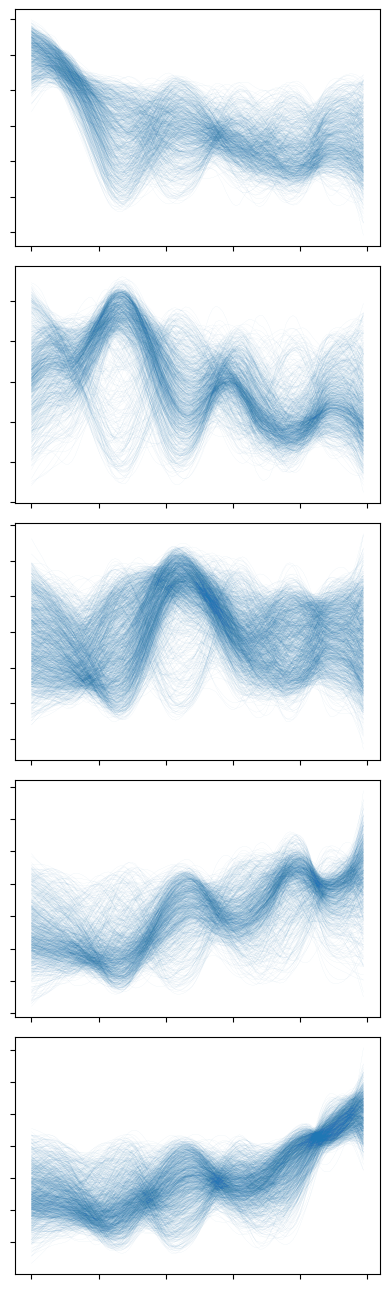

In [26]:
fig, axs = plt.subplots(5, 1, figsize=(4, 13))
for i, trend_subset in enumerate(cluster_groups):
    to_plot = trends_df_whiten_sorted.loc[trend_subset, :]
    # make plots using plt plot
    for row in to_plot.iterrows():
        axs[i].plot(row[1].values, color='#1f77b4', linewidth=0.1, alpha=0.2)
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
plt.tight_layout()
plt.savefig(f'{output_dir}/plot_cluster_extreme_T_whiten_draft.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

In [20]:
cluster_df = pd.DataFrame(np.arange(len(trends_df_sorted.index)), index=trends_df_sorted.index, columns=['number'])

In [23]:
cluster_df['cluster'] = np.nan
for i, cluster_group in enumerate(cluster_groups):
    cluster_df.loc[cluster_group, 'cluster'] = i
cluster_df

,number,cluster
DIXDC1,0,0.0
C20orf27,1,0.0
FERMT1,2,0.0
RAB6A,3,0.0
ZPR1,4,0.0
...,...,...
DNAJC16,5268,4.0
MXRA8,5269,4.0
EMC1,5270,4.0
MT-ATP6,5271,4.0


In [25]:
cluster_df.to_csv(f'{output_dir}/cluster_df_extreme_T_draft.csv')